# Fehlerfortpflanzung

In [141]:
import numpy as np

In [142]:
import uncertainties as unc
import uncertainties.unumpy as unp

In [143]:
x = unp.uarray([ 1, 3, 5 ], [ 0.5, 1, 1.5 ]) # absolute Fehler
print(x)
y = np.array([ 8, 11, 13 ]) * unc.ufloat(1, 0.1) # relative Fehler
print(y)

[1.0+/-0.5 3.0+/-1.0 5.0+/-1.5]
[8.0+/-0.8 11.0+/-1.1 13.0+/-1.3]


In [144]:
print(np.sum(x + y))
print(np.sum(x) + np.sum(y))

41.0+/-3.7
41.0+/-3.7


In [145]:
print(x - x)

[0.0+/-0 0.0+/-0 0.0+/-0]


In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_data(xdata, ydata, ax=plt, **kwargs):
    xerr = unp.std_devs(xdata)
    if np.sum(xerr)==0:
        xerr = None
    yerr = unp.std_devs(ydata)
    if np.sum(yerr)==0:
        yerr = None
    if not ('ls' in kwargs or 'linestyle' in kwargs):
        kwargs['ls'] = 'none'
    if not 'marker' in kwargs:
        kwargs['marker'] = '.'
    return ax.errorbar(unp.nominal_values(xdata), unp.nominal_values(ydata), xerr=xerr, yerr=yerr, **kwargs)

<Container object of 3 artists>

/Users/knl/.virtualenvs/scientific/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


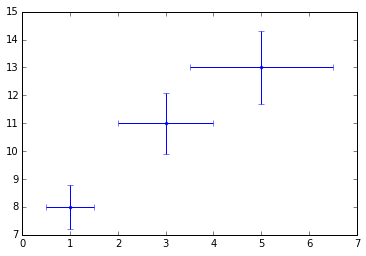

In [147]:
plot_data(x, y)

# Physikalische Einheiten

In [148]:
import pint
units = pint.UnitRegistry()
Q_ = units.Quantity
units.default_format = '~P'

In [149]:
a = 10 * units.m/units.s
a

<Quantity(10.0, 'meter / second')>

In [150]:
print(a, "{:~L}".format(a))

10.0 m/s 10.0 \frac{m}{s}


In [151]:
T_0 = Q_(23.5, units.degC)
print(T_0, T_0.to(units.K))

23.5 celsius 296.65 K


In [152]:
heating_rate = 0.5 * units.delta_degC / units.s
print(heating_rate, heating_rate.to(units.K / units.s))

0.5 Δcelsius/s 0.5 K/s


In [153]:
print(T_0 + 10 * units.minute * heating_rate)

323.5 celsius


In [171]:
u = x * units.s
v = y * units.m

In [178]:
def plot_labels(xdata, ydata):
    plt.xlabel("${:~P}$".format(xdata.units))
    plt.ylabel("${:~P}$".format(ydata.units))

/Users/knl/.virtualenvs/scientific/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


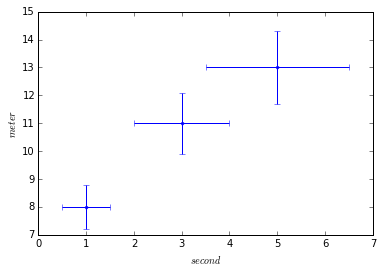

In [179]:
plot_data(u.magnitude, v.magnitude)
plot_labels(u, v)